In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')

import astropy 
%matplotlib inline 

### Simple animation 

https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c

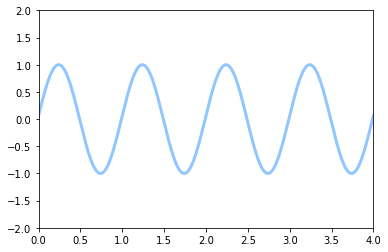

In [7]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)


anim.save('sine_wave.gif', writer='imagemagick')

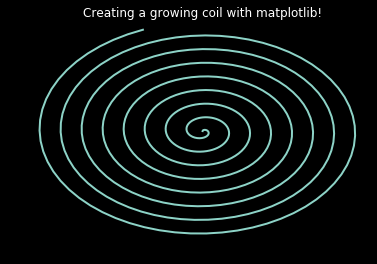

In [10]:
import matplotlib.animation as animation 
plt.style.use('dark_background')

fig = plt.figure() 
ax = plt.axes(xlim=(-50, 50), ylim=(-50, 50)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 
    # t is a parameter 
    t = 0.1*i 
    
    # x, y values to be plotted 
    x = t*np.sin(t) 
    y = t*np.cos(t) 
    
    # appending new points to x, y axes points list 
    xdata.append(x) 
    ydata.append(y) 
    line.set_data(xdata, ydata) 
    return line, 

# setting a title for the plot 
plt.title('Creating a growing coil with matplotlib!') 
# hiding the axis details 
plt.axis('off') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, 
                                frames=500, interval=20, blit=True) 

# save the animation as mp4 video file 
anim.save('coil.gif',writer='imagemagick') 

### Bouncing balls

https://python4astronomers.github.io/contest/bounce.html

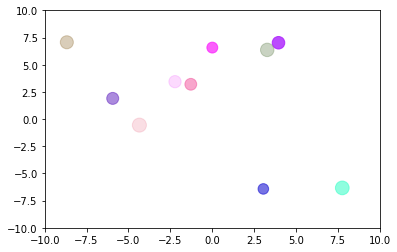

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()
plt.axis([-10, 10, -10, 10])

# Define properties of the "bouncing balls"
n = 10
pos = (20 * np.random.sample(n*2) - 10).reshape(n, 2)
vel = (0.3 * np.random.normal(size=n*2)).reshape(n, 2)
sizes = 100 * np.random.sample(n) + 100

# Colors where each row is (Red, Green, Blue, Alpha).  Each can go
# from 0 to 1.  Alpha is the transparency.
colors = np.random.sample([n, 4])

# Draw all the circles and return an object ``circles`` that allows
# manipulation of the plotted circles.
circles = plt.scatter(pos[:,0], pos[:,1], marker='o', s=sizes, c=colors)

for i in range(100):
    pos = pos + vel
    bounce = abs(pos) > 10      # Find balls that are outside walls
    vel[bounce] = -vel[bounce]  # Bounce if outside the walls
    circles.set_offsets(pos)
    plt.draw();    # Change the positions